In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [3]:
# Loading Boston Housing Data
df = pd.read_csv(r"C:\Users\youg_\machine-learning-introduction-YougOsti\BostonHousing.csv")

In [4]:
# Synopsis of Data
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# Ploting boxplot for outliers detection
def plot_boxplot(df):
    import matplotlib.pyplot as plt
    df.boxplot()
    plt.title('Boxplot for Outlier Detection')
    plt.show()

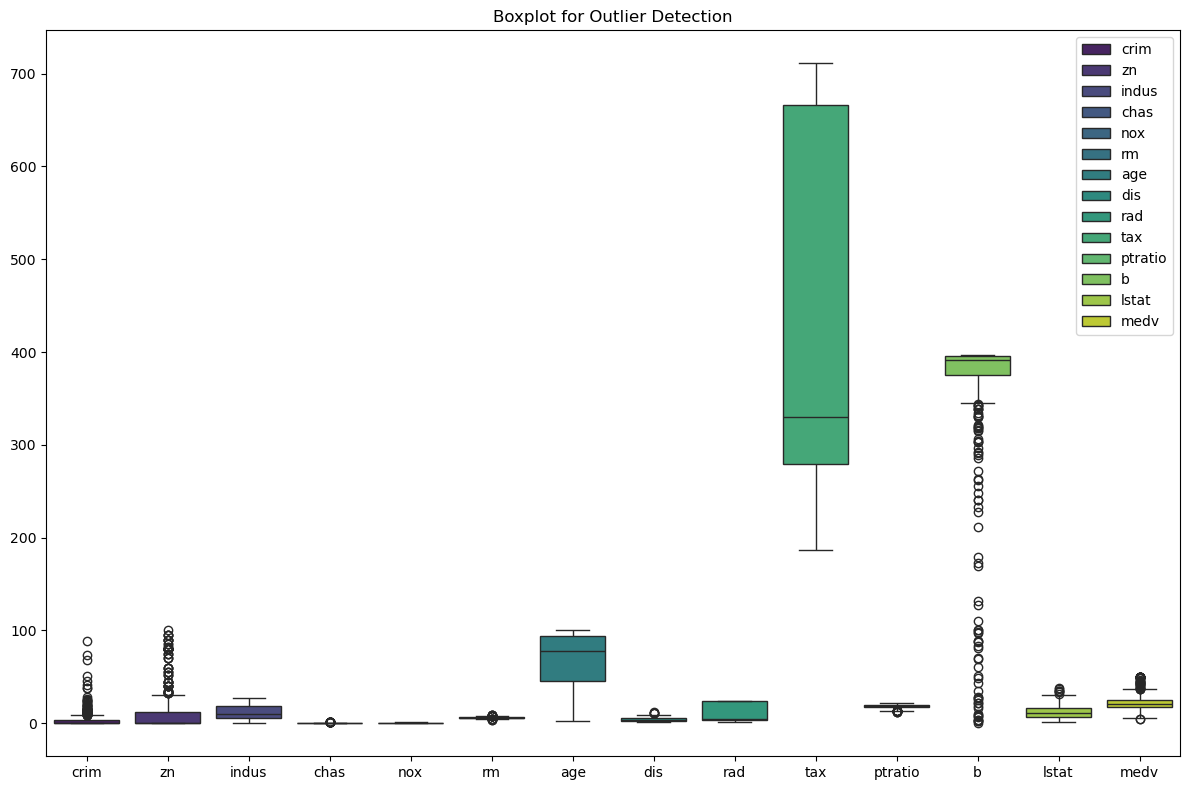

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,8))
sns.boxplot(data =df, palette = 'viridis', legend = True)
plt.title('Boxplot for Outlier Detection')
plt.tight_layout()
plt.show()

In [9]:
# Synopsis of new DataFrame
df1 = df.drop(['chas', 'b', 'rad'], axis = 1)
df1.sample(3)               

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,lstat,medv
308,0.49298,0.0,9.90,0.544,6.635,82.5,3.3175,304,18.4,4.54,22.8
399,9.91655,0.0,18.10,0.693,5.852,77.8,1.5004,666,20.2,29.97,6.3
99,0.06860,0.0,2.89,0.445,7.416,62.5,3.4952,276,18.0,6.19,33.2


In [10]:
# Spliting the data into trai_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop('medv', axis =1), df1['medv'], test_size = 0.2, random_state = 42)

In [11]:
# Synopsis of X_train
X_train.sample(3)

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,lstat
227,0.41238,0.0,6.20,0.504,7.163,79.9,3.2157,307,17.4,6.36
241,0.10612,30.0,4.93,0.428,6.095,65.1,6.3361,300,16.6,12.40
344,0.03049,55.0,3.78,0.484,6.874,28.1,6.4654,370,17.6,4.61


In [12]:
# Synopsis of y_train
y_train.sample(3)

302    26.4
328    19.3
340    18.7
Name: medv, dtype: float64

In [13]:
# Selecting model for training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Making Prediction
y_pred = model.predict(X_test)

In [15]:
y_pred

array([29.0923429 , 33.01626809, 18.25975739, 25.2221748 , 17.37761569,
       24.07411048, 17.65869753, 15.36965472, 21.26877071, 21.21531686,
       21.20519942, 18.21892991, -4.41946762, 22.36677625, 19.11528986,
       25.03288931, 19.64031786,  3.91691165, 40.2424123 , 16.07718543,
       26.96885986, 29.6589322 , 11.86478178, 25.26070172, 17.32232997,
       14.44956078, 23.32453754, 17.92636968, 19.28749326, 19.73511922,
       22.16656332, 25.29772079, 24.81147649, 16.56697461, 15.5845468 ,
       19.21863567, 31.76736773, 19.59173002, 20.84609256, 24.9484609 ,
       14.15761938, 31.20015945, 42.03065968, 17.59897459, 28.02965445,
       15.39877243, 14.77260563, 26.19693655, 18.48751218, 31.14610948,
       20.88742247, 33.53386453, 16.33528244, 27.4535347 , 39.47141218,
       21.06658195, 17.40480854, 32.34525324, 25.13397435, 12.14831087,
       21.77392895, 29.60961118, 31.24588225, 17.62014196, 21.7361628 ,
       13.20803329, 19.09793938, 26.01615469, 30.56573499, 14.70

In [16]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
score = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error : {score}')

Mean Squared Error : 25.266450230159098


In [17]:
R2_Score = r2_score(y_test, y_pred)
print(f'R2 Score : {R2_Score}')

R2 Score : 0.6554596102737348


### Model Evaluation after removing Outliers from data

In [18]:
# Importing required libraires 
from scipy import stats
import numpy as np

In [19]:
# Removing Outliers using Z-Score Method
def remove_outliers_zscore(df, threshold=3):
    df_clean = df.copy()
    numeric_cols = df.select_dtypes(include='number').columns
    z_scores = np.abs(stats.zscore(df_clean[numeric_cols]))
    mask = (z_scores < threshold).all(axis=1)
    return df_clean[mask]
df_cleaned = remove_outliers_zscore(df)

In [20]:
df_cleaned.sample(4)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
451,5.44114,0.0,18.10,0,0.713,6.655,98.2,2.3552,24,666,20.2,355.29,17.73,15.2
233,0.33147,0.0,6.20,0,0.507,8.247,70.4,3.6519,8,307,17.4,378.95,3.95,48.3
18,0.80271,0.0,8.14,0,0.538,5.456,36.6,3.7965,4,307,21.0,288.99,11.69,20.2
97,0.12083,0.0,2.89,0,0.445,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7


In [21]:
# Splitig the data to train_test_split
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(df_cleaned.drop('medv', axis =1), df_cleaned['medv'], test_size = 0.2, random_state = 42)

In [22]:
# Training the model with cleaned data
model.fit(X_train_cleaned, y_train_cleaned)

LinearRegression()

In [23]:
# Making prediction on the basis of cleaned data
y_pred_cleaned = model.predict(X_test_cleaned)

In [24]:
# Model Evaluatian
score = mean_squared_error(y_test_cleaned, y_pred_cleaned)
print(f'Mean Squared Error : {score}')

Mean Squared Error : 10.621445730673052


In [25]:
R2_Score = r2_score(y_test_cleaned, y_pred_cleaned)
print(f'R2 Score : {R2_Score}')

R2 Score : 0.7761172997388452


### Working on new feature by creating new coulmns from the Boston Housing Data

In [33]:
# Loading Preprocessed Data
X_train_new = pd.read_csv(r"C:\Users\youg_\machine-learning-introduction-YougOsti\Notebooks\data\X_train.csv")
y_train_new = pd.read_csv(r"C:\Users\youg_\machine-learning-introduction-YougOsti\Notebooks\data\y_train.csv")
X_test_new = pd.read_csv(r"C:\Users\youg_\machine-learning-introduction-YougOsti\Notebooks\data\X_test.csv")
y_test_new = pd.read_csv(r"C:\Users\youg_\machine-learning-introduction-YougOsti\Notebooks\data\y_test.csv")

##### Creating new features

In [34]:
# Room-to-LSTAT ratio
X_train_new['rm_lstat_ratio'] = X_train_new['rm'] / (X_train_new['lstat'] + 1)
X_test_new['rm_lstat_ratio'] = X_test_new['rm'] / (X_test_new['lstat'] + 1)

In [44]:
X_train_new['rm_squared'] = X_train_new['rm'] ** 2
X_test_new['rm_squared'] = X_test_new['rm'] ** 2

In [45]:
print(X_train_new.shape, X_test_new.shape)

(404, 15) (102, 15)


In [47]:
X_train_new.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,rm_lstat_ratio,rm_squared
0,1.327804,-0.487722,1.015999,0,0.512296,-1.397069,1.021481,-0.805438,24,1.530926,0.806576,-0.078878,1.718101,-0.513987,1.951803
1,-0.347506,-0.487722,-0.437258,0,-0.144217,-0.642000,-0.429390,0.334449,4,-0.601276,1.176466,0.427018,-0.586356,-1.552059,0.412164
2,-0.416484,1.014463,-0.740749,0,-1.008914,-0.361342,-1.610001,1.352738,1,-0.619094,-0.719220,0.061137,-0.676067,-1.115485,0.130568


In [48]:
# Selecting the model and  training it
model = LinearRegression()
model.fit(X_train_new, y_train_new)

LinearRegression()

In [52]:
# Making Prediction
y_pred_new = model.predict(X_test_new)

In [51]:
# Evaluation of model
mse_new = mean_squared_error(y_test_new, y_pred_new)
r2_new = r2_score(y_test_new, y_pred_new)

print(f"Mean Squared Error (with new features): {mse_new:.2f}")
print(f"R-squared (with new features): {r2_new:.2f}")

Mean Squared Error (with new features): 24.60
R-squared (with new features): 0.66
